
# Women and Children first...? The Sinking of the RMS Titanic

A statistical analysis by Eliu Schmitt (mail@eliu.de).

On April 14th, 1912 the RMS Titanic on the maiden voyage from Southampton to New York hit an iceberg in the Atlantic. Over 1.500 of the 2,224 passengers and crew on board died when the ship sank. Due to the high number of casualties this is one the biggest accidents in civil shipping.

The high number of casualties rises many question. First and foremost, why so few people could be saved. While this question is manly attributed to a limited number of lifeboats, it also raises questions, who was saved? What are the deciding factors for a passenger to be saved? I'll primarily look at the title of this study: "Women and Children first...", a code of conduct to save women and children first in life threatening situations. Additional I follow the question if the Rich were saved ahead of the poor.

In [1]:
# Python3.5

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from collections import Counter
from scipy.stats import ttest_ind, tmean, tstd, ttest_ind_from_stats, linregress, norm, t, pearsonr, chi2_contingency


# data = list(csv.reader(open('titanic-data.csv', 'r'), delimiter=','))
# data = pd.read_csv('titanic-data.csv')


def get_st(c):
    """
    A helper function that returns the appropriate str representation of 1, 2, and 3: 
    '1': '1st', '2': '2nd', '3': '3rd'
    """
    return ['1st', '2nd', '3rd'][c - 1]


def get_percentage(a, b, r=2, with_brackets=True):
    """
    A helper function to return a percentage for two values.
    returns a / b * 100
    Default rounding is 2. Default is with brackets.
    """
    if with_brackets:
        return "(" + "{:.2f}".format(round(a / b * 100, r)) + " %)"
    else:
        return "{:.2f}".format(round(a / b * 100, r)) + " %"

C:\Users\Eliu\Anaconda2\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## About the data

The dataset contained information on 891 passengers. Therefore, a relevant portion of the passengers is covered. No data on staff is included in the source.

In [2]:
df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A unique passenger-id is provided for every entry. There seems to be no more information than individually identifying the person.

In [3]:
# Data preparation

# PassengerId
# No changes on the passenger id. Each passenger Id unique
print("Only unique PassengerId:", len(Counter(df['PassengerId'])) == len(df))

Only unique PassengerId: True


Survival in the accident is registered for every passenger. The values were converted into True (did survive) and False (did not survive).

In [4]:
# Survived

# Data is provided for all passengers either as 0: did not survive or 1: did survive. No other values where found.
print(Counter(df['Survived']))

# Converted column into bool: 0: False and 1: True
df['Survived'] = df['Survived'] == 1
print(Counter(df['Survived']))

Counter({0: 549, 1: 342})
Counter({False: 549, True: 342})


A passenger class ('Pclass') is registered for every passenger.

In [5]:
# Passenger class ('Pclass')
# There where three booking classes. No values other than 1, 2 or 3 were found.
print(df['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


A unique name is provided for every passenger. Therefore, it is  unlikely that there are double entries.

In [6]:
# Name
# A Name was given for every Passenger, all names were unique
print("Only unique names:", len(Counter(df['Name'])) == len(df))

Only unique names: True


Gender is stated as either 'male' or 'female' and given for every passenger.

In [7]:
# Sex
# The gender is given as 'male'or 'female', there is data for every passengerdf['Sex']))
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Age is given either as a integer number, a float or a blank. Values as a number are normal entries, with a decimal point estimations, blank are unknown. Values are not given for all passengers. I used the full dataset for all purposes that do not include age and a reduced dataset that drops the missing values but retains the estimates for all purposes that relate to the age of the passengers.

All values are within a reasonable range.

In [8]:
# Age
print("Total age values:", sum(df['Age'] > 0))
print("Missing values:", len(df) - sum(df['Age'] > 0))
print("Estimated values:", sum(df['Age'] % 1 > 0))

# The values are within a reasonable range (0.4 - 80 years)
df_age = df.dropna(subset=['Age'])
print("Max age:", df_age['Age'].max(), "Min age:", df_age['Age'].min())

Total age values: 714
Missing values: 177
Estimated values: 25
Max age: 80.0 Min age: 0.42


The number of siblings and spouses on board was given as a number ('SibSp'). All numbers are within a reasonable range. The number of parents and children on board are separately given as number ('Parch'). All number are with a reasonable range. A new column was added with the total number of relatives on board.

In [9]:
df['Relatives'] = df['SibSp'] + df['Parch']

def passenger_basic_stats(group, label):
    """
    Prints some basic stats about a passenger group.
    """
    print(label)
    print("Count:", len(group), "Mean:", group.mean(), "Std.:", group.std(), "Max:", group.max(), "Min:", group.min())
    print("")

# SibSp - Siblings and Spouses on board
passenger_basic_stats(df['SibSp'], "Siblings and Spouses")

# Parch - Parents and Children on board
passenger_basic_stats(df['Parch'], "Parent and Children")

# Relatives
passenger_basic_stats(df['Relatives'], "Relatives")

print("Count traveling with relatives:", sum(df['Relatives'] > 0))
print("Count traveling without relatives:", sum(df['Relatives'] == 0))

Siblings and Spouses
Count: 891 Mean: 0.523007856341 Std.: 1.10274343229 Max: 8 Min: 0

Parent and Children
Count: 891 Mean: 0.381593714927 Std.: 0.80605722113 Max: 6 Min: 0

Relatives
Count: 891 Mean: 0.904601571268 Std.: 1.61345854136 Max: 10 Min: 0

Count traveling with relatives: 354
Count traveling without relatives: 537


The ticket number seems to follow different systems. Various numbers are registered for more than one passenger, so the ticket number is not unique. The same number probably means that the passengers booked the trip together, but the count of single ticket number at 547 seems to be quite high, given the assumption, that passengers would probably not go on the voyage alone. Thought it is nearly the same number as people traveling without any relatives on board. The unique tickets were mostly held by passengers without registered relatives on board. The others might be people who travel with friends or are unmarried couples. I added another column that indicates, if the passenger holds an individual ticket.

In [10]:
df['IndividualTicket'] = df['Ticket'].isin([k for k, v in Counter(df['Ticket']).items() if v == 1])

print('Count not unique ticket holder:', df['IndividualTicket'].value_counts()[False])
print('Count unique ticket holder:',   df['IndividualTicket'].value_counts()[True])
print("")
print("Only for passengers traveling without relatives:")
print('Count not unique ticket holder:', df.where(df['Relatives'] == 0)['IndividualTicket'].value_counts()[False])
print('Count unique ticket holder:', df.where(df['Relatives'] == 0)['IndividualTicket'].value_counts()[True])

Count not unique ticket holder: 344
Count unique ticket holder: 547

Only for passengers traveling without relatives:
Count not unique ticket holder: 75
Count unique ticket holder: 462


The data for fare per passenger seems to be also inconsistent. Some have registered no fare at all (0 Pounds). The maximum of the fares is a first class ticket but about 6 times more expensive than a first class ticket on average. The fares therefore probably sometimes include other passengers as well. There could also be some "free rides", maybe somebody has won a ticket.

In [11]:
print("Mean Fare:", df['Fare'].mean())
print("Median Fare:", df['Fare'].median())
print("Max. Fare", df['Fare'].max())
print("Count Fare 0:", sum(df['Fare'] == 0))
print("Mean 1st class:", df.where(df['Pclass'] == 1)['Fare'].mean())
print("Mean 2nd class:", df.where(df['Pclass'] == 2)['Fare'].mean())
print("Mean 3rd class:", df.where(df['Pclass'] == 3)['Fare'].mean())

Mean Fare: 32.2042079686
Median Fare: 14.4542
Max. Fare 512.3292
Count Fare 0: 15
Mean 1st class: 84.1546875
Mean 2nd class: 20.6621831522
Mean 3rd class: 13.6755501018


Most passenger data do not register a cabin. It is not fully clear, if this is just missing data, or if these passengers did not have a cabin (but rather a dormitory or similar). I tend to the missing data, since with the second option we would expect that the 1st class passenger all have a cabin, but here are also quite some without any entry. The cabin data could be used to estimate the length of the way to the lifeboats. Although, it isn't clear, if the passengers actually stayed at the cabin at the time and there is quite some data missing, therefore this is probably too difficult.

In [12]:
print("Cabin not specified:", df['Cabin'].isnull().sum())
print("Cabin specified:", df['Cabin'].count())

Cabin not specified: 687
Cabin specified: 204


The port of embarkation was specified for all passengers.

## The passengers

The following provides a look into the structure of the passenger group.

### Gender

There are more men than women traveling. The women are more likely to travel in a higher passenger class.

In [13]:
def gender_by_class(g, c):
    """
    prints distribution of gender by passenger class (1, 2 or 3) and group of passengers.
    arg g: dataframe
    """
    if c in [1, 2, 3]:
        print("{} class".format(get_st(c)))
    
        subset = g.where(g['Pclass'] == c).dropna(subset=['Pclass'])
        print("Count:", len(subset),
              "Men:", subset['Sex'].value_counts()['male'],
              get_percentage(subset['Sex'].value_counts()['male'], len(subset)),
              "Women:", subset['Sex'].value_counts()['female'],
              get_percentage(subset['Sex'].value_counts()['female'], 
                             len(subset)))
    else:
        print("All passengers")
        subset = g
        print("Count:", len(subset),
              "Men:", subset['Sex'].value_counts()['male'],
              get_percentage(subset['Sex'].value_counts()['male'], len(subset)),
              "Women:", subset['Sex'].value_counts()['female'],
              get_percentage(subset['Sex'].value_counts()['female'], 
                             len(subset)))
    print("")

    
def gender_all_classes(group, label=""):
    if label:
        print(label)
        print("")
    gender_by_class(group, None)
    gender_by_class(group, 1)
    gender_by_class(group, 2)
    gender_by_class(group, 3)    

In [14]:
gender_all_classes(df)

All passengers
Count: 891 Men: 577 (64.76 %) Women: 314 (35.24 %)

1st class
Count: 216 Men: 122 (56.48 %) Women: 94 (43.52 %)

2nd class
Count: 184 Men: 108 (58.70 %) Women: 76 (41.30 %)

3rd class
Count: 491 Men: 347 (70.67 %) Women: 144 (29.33 %)



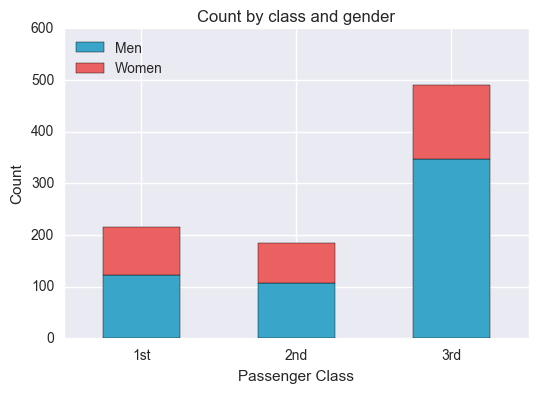

In [15]:
%matplotlib inline

def count_by_class_and_gender(c, g):
    """
    returns number if passenger if class and gender is specified.
    """
    subset = df.where(df['Pclass'] == c).dropna(subset=['Pclass'])
    return subset['Sex'].value_counts()[g]

menCount = [count_by_class_and_gender(c, 'male') for c in [1, 2, 3]]
womenCount = [count_by_class_and_gender(c, 'female') for c in [1, 2, 3]]
width = 0.5 

p1 = plt.bar([0.5, 1.5, 2.5], menCount, width, color='#38A5C9')
p2 = plt.bar([0.5, 1.5, 2.5], womenCount, width, color='#EB6060',
             bottom=menCount)

plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.title('Count by class and gender')
plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.yticks(np.arange(0, 650, 100))
plt.legend((p1[0], p2[0]), ('Men', 'Women'), loc="upper left")
plt.show()

### Age

The distribution shows that the majority of the passengers are between 20 and 30 years old.

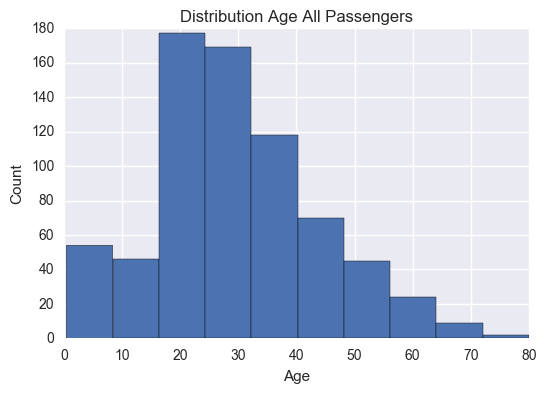

In [16]:
%matplotlib inline

def passenger_age_stats(c, label):
    """
    Print basic passenger stats on age for a group of passengers.
    
    arg c: pandas.dataframe
    arg label: string, label of the printout
    """
    c = c['Age']
    print(label)
    print("Count:", len(c), "Max Age:", int(c.max()), "Mean Age:", round(c.mean(), 1), "Std.Dev.:", round(c.std(), 1))   
    print("")

plt.hist(df_age['Age'], label='Count Age All Passengers')
plt.title('Distribution Age All Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Male passengers tend to be ca. 3 years older on average. But the distribution seems to follow mostly the same pattern.

Women
Count: 261 Max Age: 63 Mean Age: 27.9 Std.Dev.: 14.1

Men
Count: 453 Max Age: 80 Mean Age: 30.7 Std.Dev.: 14.7



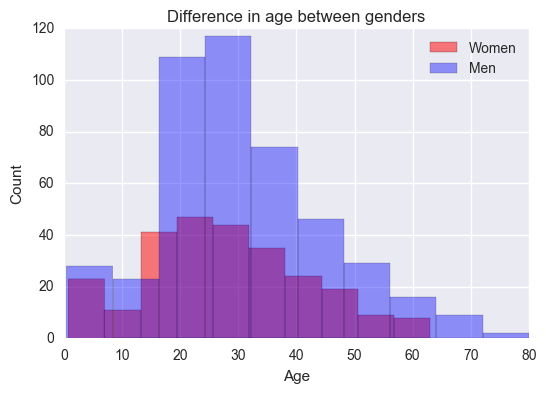

In [17]:
%matplotlib inline

passenger_age_stats(df_age.where(df_age['Sex'] == 'female').dropna(subset=['Sex']), "Women")
passenger_age_stats(df_age.where(df_age['Sex'] == 'male').dropna(subset=['Sex']), "Men")

plt.hist(df_age.where(df_age['Sex'] == 'female').dropna(subset=['Sex'])['Age'], color='red', alpha=0.5, label='Women')
plt.hist(df_age.where(df_age['Sex'] == 'male').dropna(subset=['Sex'])['Age'], color='blue', alpha=0.4, label='Men')
plt.title('Difference in age between genders')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age varies highly by passenger class with a higher average age at a higher booking class.

In [18]:
passenger_age_stats(df_age, "All passengers")
passenger_age_stats(df_age.where(df_age['Pclass'] == 1).dropna(subset=['Pclass']), "1st passenger class")
passenger_age_stats(df_age.where(df_age['Pclass'] == 2).dropna(subset=['Pclass']), "2nd passenger class")
passenger_age_stats(df_age.where(df_age['Pclass'] == 3).dropna(subset=['Pclass']), "3rd passenger class")

All passengers
Count: 714 Max Age: 80 Mean Age: 29.7 Std.Dev.: 14.5

1st passenger class
Count: 186 Max Age: 80 Mean Age: 38.2 Std.Dev.: 14.8

2nd passenger class
Count: 173 Max Age: 70 Mean Age: 29.9 Std.Dev.: 14.0

3rd passenger class
Count: 355 Max Age: 74 Mean Age: 25.1 Std.Dev.: 12.5



### Fare

The fare the passenger payed is generally higher if he's traveling in a better passenger class. While the passenger class might be an generally estimation of the socio-economic status of the passenger, the actual fare might even hold more insight since the values are more varied.

In [19]:
print("Correlation (Pearsons R) Passenger Class and Fare")
print(round(pearsonr(df['Pclass'],df['Fare'])[0], 2))

Correlation (Pearsons R) Passenger Class and Fare
-0.55


The distribution of the ticket price in the second and third class shows that most ticket cost between 7.5 and 15.0 Pounds. There seems to be a second peak with the second class but that is probably due to more passengers billed on one ticket because the higher price also leads to a higher number of relatives on board. Therefore, the passenger was probably not traveling more expensive but just paying for more passengers. In that context the price of the ticket seems to be not a better indicator for social status.

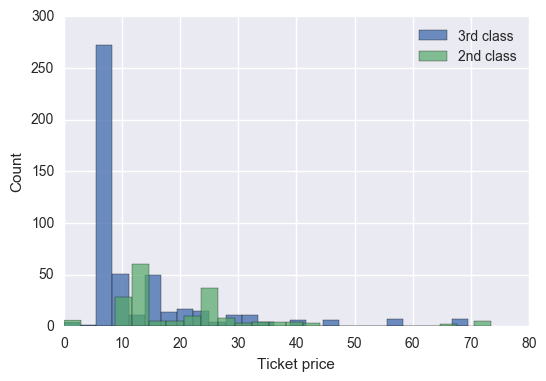

In [20]:
df.where(df['Pclass'] == 3).dropna(subset=['Pclass'])['Fare'].hist(bins=25, alpha=0.8, label="3rd class")
df.where(df['Pclass'] == 2).dropna(subset=['Pclass'])['Fare'].hist(bins=25, alpha=0.7, label="2nd class")
plt.xlabel('Ticket price')
plt.ylabel('Count')
plt.legend()

In [21]:
print("2nd class ticket less than 15.0 pounds - Average relatives on board:", 
     round(df.where(df['Pclass'] == 2).dropna(subset=['Pclass']).where(df['Fare'] < 15).dropna(subset=['Fare'])['Relatives'].mean(), 2))
print("2nd class ticket more than 15.0 pounds - Average relatives on board:", 
     round(df.where(df['Pclass'] == 2).dropna(subset=['Pclass']).where(df['Fare'] >= 15).dropna(subset=['Fare'])['Relatives'].mean(), 2))


2nd class ticket less than 15.0 pounds - Average relatives on board: 0.12
2nd class ticket more than 15.0 pounds - Average relatives on board: 1.48


Mean price: 84.15
Median price: 60.29

Count price < 200: 20


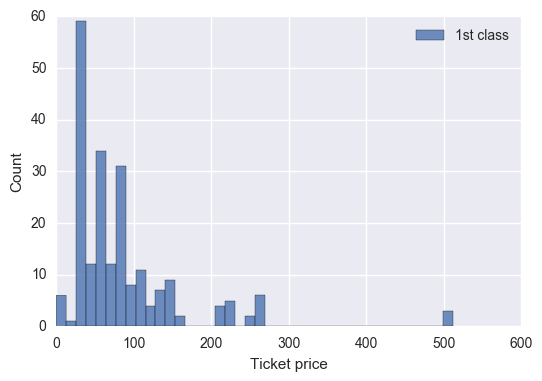

In [22]:
df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])['Fare'].hist(bins=40, alpha=0.8, label="1st class")
plt.xlabel('Ticket price')
plt.ylabel('Count')
plt.legend()
print("Mean price:", round(df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])['Fare'].mean(), 2))
print("Median price:", round(df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])['Fare'].median(), 2))
print("")
print("Count price < 200:", 
      len(df.where(df['Pclass'] == 1).dropna(subset=['Pclass']).where(df['Fare'] >= 200).dropna(subset=['Fare'])))

The price varies more in the first class. The very high prices could by outliers or there could be some very special cabins that are much more expensive. The mean seems to be a better measurement of centrality here. The ticket holders of 200 Pounds and above might be of much higher social status than the other passengers. For a statistical analysis the group seems to be very small. I would not expect meaningful statistical results from that group.

In [23]:
print("Fares by class")
print("1st class")
print("Mean:", round(df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])['Fare'].mean(), 2), 
      "Median:", round(df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])['Fare'].median(), 2))
print("2nd class")
print("Mean:", round(df.where(df['Pclass'] == 2).dropna(subset=['Pclass'])['Fare'].mean(), 2), 
      "Median:", df.where(df['Pclass'] == 2).dropna(subset=['Pclass'])['Fare'].median())
print("3rd class")
print("Mean:", round(df.where(df['Pclass'] == 3).dropna(subset=['Pclass'])['Fare'].mean(), 2), 
      "Median:", df.where(df['Pclass'] == 3).dropna(subset=['Pclass'])['Fare'].median())

Fares by class
1st class
Mean: 84.15 Median: 60.29
2nd class
Mean: 20.66 Median: 14.25
3rd class
Mean: 13.68 Median: 8.05


The difference in the mean or median fare payed by the passengers differs by class. The difference between 2nd and 3rd class seems to be a lot lower than between 1st and the 2nd or 3rd class. Therefore, the socioeconomic status of the 2nd and 3rd class might be not so far away from each other. The median price at the second class and the mean price of the 3rd class are even nearly the same (14.3 and 13.7). Therefore, it is to be expected that there is some mix, and that people of a lower status got a ticket in the second class. This could lead to the conclusion that the relevant socio-economic status of passengers in 2nd class and 3rd class might be more or less the same. Although analysis of the survivors will show that there are relevant differences between the second and the third class. Therefore, I will use passenger class as an estimation of status and wealth.

## The Survivors

Out of all passengers in the list only 342 survived. A lot more women survived, even given that there were more men than women in the group. The survivors are roughly evenly distributed between the three booking classes with a somewhat higher count towards 1st class and a lower towards the 2nd class. Compared to the people traveling in that class in total the percentage show an advantage of the higher booking classes. Age in general seems to have only little effect, but looking at children ages 7 years or younger shows a different picture.

In [24]:
df_alive = df.where(df['Survived'] == True).dropna(subset=['Survived'])
df_alive_age = df_age.where(df['Survived'] == True).dropna(subset=['Survived'])

def survival_statistic(count_survivors, count_total, label):
    print(label)
    print(count_survivors, "out of", count_total, "survived", get_percentage(count_survivors, count_total) + ".")
    print("")

### Gender

In [25]:
gender_all_classes(df_alive, "Only surviving passengers")

Only surviving passengers

All passengers
Count: 342 Men: 109 (31.87 %) Women: 233 (68.13 %)

1st class
Count: 136 Men: 45 (33.09 %) Women: 91 (66.91 %)

2nd class
Count: 87 Men: 17 (19.54 %) Women: 70 (80.46 %)

3rd class
Count: 119 Men: 47 (39.50 %) Women: 72 (60.50 %)



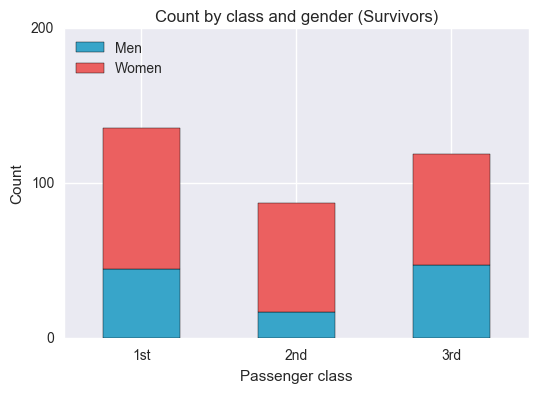

In [26]:
%matplotlib inline

def count_by_class_and_gender_s(c, g):
    """
    returns number if passenger if class and gender is specified.
    """
    subset = df_alive.where(df_alive['Pclass'] == c).dropna(subset=['Pclass'])
    return subset['Sex'].value_counts()[g]

menCount = [count_by_class_and_gender_s(c, 'male') for c in [1, 2, 3]]
womenCount = [count_by_class_and_gender_s(c, 'female') for c in [1, 2, 3]]
width = 0.5 

p1 = plt.bar([0.5, 1.5, 2.5], menCount, width, color='#38A5C9')
p2 = plt.bar([0.5, 1.5, 2.5], womenCount, width, color='#EB6060',
             bottom=menCount)

plt.ylabel('Count')
plt.title('Count by class and gender (Survivors)')
plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.yticks(np.arange(0, 250, 100))
plt.legend((p1[0], p2[0]), ('Men', 'Women'), loc="upper left")
plt.xlabel('Passenger class')
plt.show()

Women had much better chance of survival.

In [27]:
survival_statistic(len(df_alive.where(df_alive['Sex'] == 'male').dropna(subset=['Sex'])),
                   len(df.where(df['Sex'] == 'male').dropna(subset=['Sex'])),
                   "Surviving Men")
survival_statistic(len(df_alive.where(df_alive['Sex'] == 'female').dropna(subset=['Sex'])),
                   len(df.where(df['Sex'] == 'female').dropna(subset=['Sex'])),
                   "Surviving Women")


Surviving Men
109 out of 577 survived (18.89 %).

Surviving Women
233 out of 314 survived (74.20 %).



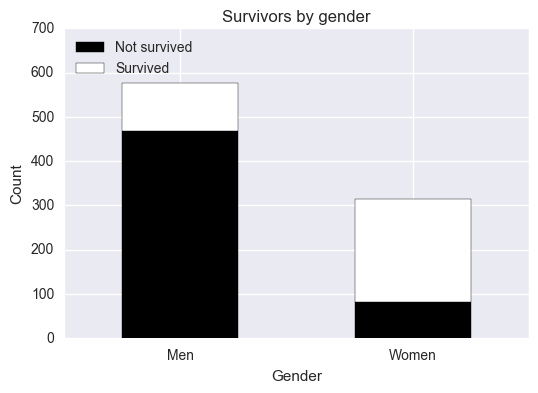

In [28]:
%matplotlib inline

survivors = [len(df_alive.where(df_alive['Sex'] == 'male').dropna(subset=['Sex'])), 
             len(df_alive.where(df_alive['Sex'] == 'female').dropna(subset=['Sex']))]
dead = [len(df.where(df['Sex'] == 'male').dropna(subset=['Sex'])) - len(df_alive.where(df_alive['Sex'] == 'male').dropna(subset=['Sex'])),
        len(df.where(df['Sex'] == 'female').dropna(subset=['Sex'])) - len(df_alive.where(df_alive['Sex'] == 'female').dropna(subset=['Sex']))]

width = 0.5 

p1 = plt.bar([0.5, 1.5], dead, width, color='black')
p2 = plt.bar([0.5, 1.5], survivors, width, color='white',
             bottom=dead)

plt.ylabel('Count')
plt.title('Survivors by gender')
plt.xticks((.25, 0.75, 1.75, 2.25), ('', 'Men', 'Women'))
plt.yticks(np.arange(0, 800, 100))
plt.legend((p1[0], p2[0]), ('Not survived', 'Survived'), loc="upper left")
plt.xlabel('Gender')
plt.show()

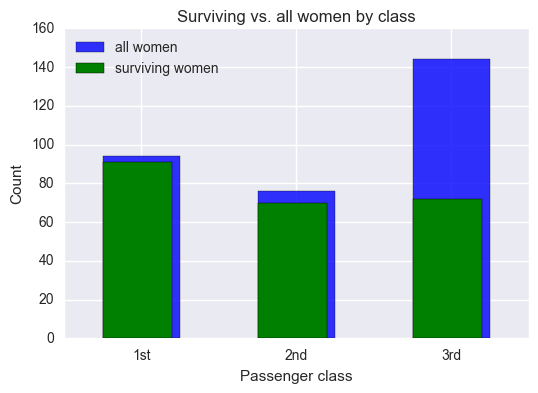

In [29]:
x = df.where(df['Sex'] == 'female').dropna(subset=['Sex'])['Pclass']
y = df_alive.where(df['Sex'] == 'female').dropna(subset=['Sex'])['Pclass']
x = (x.value_counts()[1], x.value_counts()[2], x.value_counts()[3])
y = (y.value_counts()[1], y.value_counts()[2], y.value_counts()[3])

h1 = plt.bar((0.5, 1.5, 2.5), x, label='all women', width=0.5, color='blue', alpha=0.8)
h2 = plt.bar((0.5, 1.5, 2.5), y, label='surviving women', width=0.45, color='green')

plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.legend(loc="upper left")
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Surviving vs. all women by class')
plt.show()

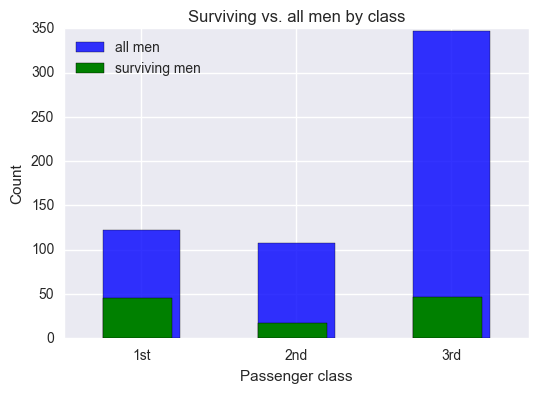

In [30]:
x = df.where(df['Sex'] == 'male').dropna(subset=['Sex'])['Pclass']
y = df_alive.where(df['Sex'] == 'male').dropna(subset=['Sex'])['Pclass']
x = (x.value_counts()[1], x.value_counts()[2], x.value_counts()[3])
y = (y.value_counts()[1], y.value_counts()[2], y.value_counts()[3])

h1 = plt.bar((0.5, 1.5, 2.5), x, label='all men', width=0.5, color='blue', alpha=0.8)
h2 = plt.bar((0.5, 1.5, 2.5), y, label='surviving men', width=0.45, color='green')

plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.legend(loc="upper left")
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Surviving vs. all men by class')
plt.show()

Women form the 1st and 2nd passenger class had a much better chance than from the 3rd class. Nearly all women of 1st and 2nd class survived, while only half of the women traveling in 3rd class survived.

The had a lower chance of survival but the chances for the 3rd class are a lot worse again.

### Percentage of survivors by class relative to total passengers in that class

In [31]:
survival_statistic(len(df_alive.where(df_alive['Pclass'] == 1).dropna(subset=['Pclass'])),
                   len(df.where(df['Pclass'] == 1).dropna(subset=['Pclass'])),
                   "Survivors 1st class")
survival_statistic(len(df_alive.where(df_alive['Pclass'] == 2).dropna(subset=['Pclass'])),
                   len(df.where(df['Pclass'] == 2).dropna(subset=['Pclass'])),
                   "Survivors 2nd class")
survival_statistic(len(df_alive.where(df_alive['Pclass'] == 3).dropna(subset=['Pclass'])),
                   len(df.where(df['Pclass'] == 3).dropna(subset=['Pclass'])),
                   "Survivors 3rd class")

Survivors 1st class
136 out of 216 survived (62.96 %).

Survivors 2nd class
87 out of 184 survived (47.28 %).

Survivors 3rd class
119 out of 491 survived (24.24 %).



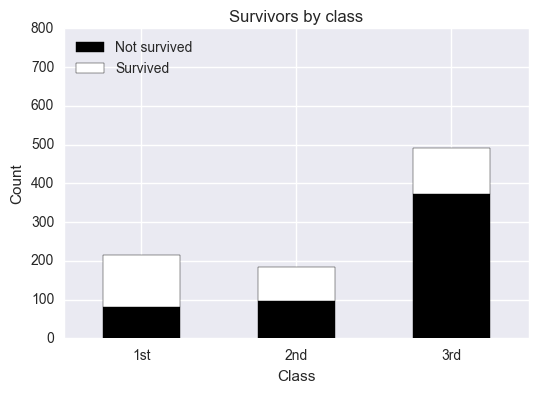

In [32]:
%matplotlib inline

survivors = [136, 87, 119]
dead = [216 - 136, 184 - 87, 491 - 119]
width = 0.5 

p1 = plt.bar([0.5, 1.5, 2.5], dead, width, color='black')
p2 = plt.bar([0.5, 1.5, 2.5], survivors, width, color='white',
             bottom=dead)

plt.ylabel('Count')
plt.title('Survivors by class')
plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.yticks(np.arange(0, 860, 100))
plt.legend((p1[0], p2[0]), ('Not survived', 'Survived'), loc="upper left")
plt.xlabel('Class')
plt.show()

Survival was more likely in the 1st and 2nd class than in the third.

### Age

The average age of the survivors is only slightly lower than for all passengers.

In [33]:
passenger_age_stats(df_age, "All passengers")
passenger_age_stats(df_alive_age, "All survivors")

All passengers
Count: 714 Max Age: 80 Mean Age: 29.7 Std.Dev.: 14.5

All survivors
Count: 290 Max Age: 80 Mean Age: 28.3 Std.Dev.: 15.0



### Survivors in different age groups

In [34]:
survival_statistic(len(df_alive_age),
                   len(df_age),
                   "All passengers")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] <= 7).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] <= 7).dropna(subset=['Age'])),
                   "Children (0 - 7 years)")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] <= 18).where(df_alive_age['Age'] > 7).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] <= 18).where(df_age['Age']> 7).dropna(subset=['Age'])),
                   "Young (7 to 18 years)")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] < 60).where(df_alive_age['Age'] > 18).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] < 60).where(df_age['Age']> 18).dropna(subset=['Age'])),
                   "Adults (18 to 60 years)")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] < 30).where(df_alive_age['Age'] > 18).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] < 30).where(df_age['Age']> 18).dropna(subset=['Age'])),
                   "Adults (18 to 30 years)")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] < 60).where(df_alive_age['Age'] >= 30).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] < 60).where(df_age['Age']>= 30).dropna(subset=['Age'])),
                   "Adults (30 to 60 years)")
survival_statistic(len(df_alive_age.where(df_alive_age['Age'] >= 60).dropna(subset=['Age'])),
                   len(df_age.where(df_age['Age'] >= 60).dropna(subset=['Age'])),
                   "Older passengers (60 + years)")


All passengers
290 out of 714 survived (40.62 %).

Children (0 - 7 years)
34 out of 50 survived (68.00 %).

Young (7 to 18 years)
36 out of 89 survived (40.45 %).

Adults (18 to 60 years)
213 out of 549 survived (38.80 %).

Adults (18 to 30 years)
86 out of 245 survived (35.10 %).

Adults (30 to 60 years)
127 out of 304 survived (41.78 %).

Older passengers (60 + years)
7 out of 26 survived (26.92 %).



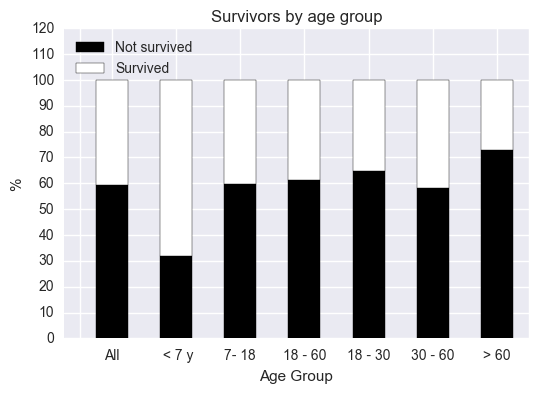

In [35]:
%matplotlib inline

survivors = [40.62, 68, 40.45, 38.60, 35.10, 41.78, 26.92]
dead = [100 - n for n in survivors]
width = 0.5 

p1 = plt.bar([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], dead, width, color='black')
p2 = plt.bar([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], survivors, width, color='white',
             bottom=dead)

plt.ylabel('%')
plt.title('Survivors by age group')
plt.xticks((.25, 0.75, 1.75, 2.75, 3.75, 4.75, 5.75, 6.75, 7.25), ('', 'All', ' < 7 y', '7- 18', '18 - 60',  '18 - 30', '30 - 60', '> 60'))
plt.yticks(np.arange(0, 130, 10))
plt.legend((p1[0], p2[0]), ('Not survived', 'Survived'), loc="upper left")
plt.xlabel('Age Group')
plt.show()

The chance of survival is a lot better for children and a bit worse for old people.

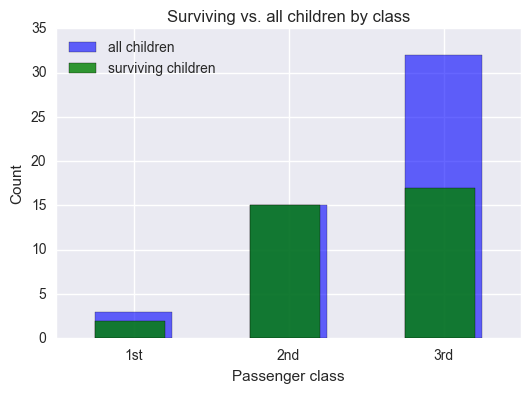

In [36]:
x = df_age.where(df_age['Age'] <= 7).dropna(subset=['Age'])['Pclass']
y = df_alive_age.where(df_alive_age['Age'] <= 7).dropna(subset=['Age'])['Pclass']
x = (x.value_counts()[1], x.value_counts()[2], x.value_counts()[3])
y = (y.value_counts()[1], y.value_counts()[2], y.value_counts()[3])

h1 = plt.bar((0.5, 1.5, 2.5), x, label='all children', width=0.5, color='blue', alpha=0.6)
h2 = plt.bar((0.5, 1.5, 2.5), y, label='surviving children', width=0.45, color='green', alpha=0.8)

plt.xticks((.25, 0.75, 1.75, 2.75, 3.25), ('', '1st', '2nd', '3rd'))
plt.legend(loc="upper left")
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Surviving vs. all children by class')
plt.show()

The children wo died where almost all from the 3rd class.

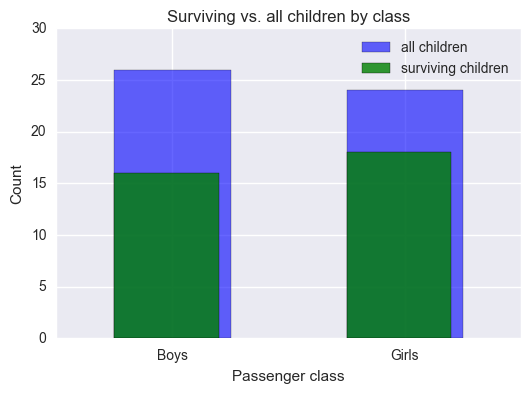

In [37]:
x = df_age.where(df_age['Age'] <= 7).dropna(subset=['Age'])['Sex']
y = df_alive_age.where(df_alive_age['Age'] <= 7).dropna(subset=['Age'])['Sex']
x = (x.value_counts()['male'], x.value_counts()['female'])
y = (y.value_counts()['male'], y.value_counts()['female'])

h1 = plt.bar((0.5, 1.5), x, label='all children', width=0.5, color='blue', alpha=0.6)
h2 = plt.bar((0.5, 1.5), y, label='surviving children', width=0.45, color='green', alpha=0.8)

plt.xticks((.25, 0.75, 1.75, 2.25), ('', 'Boys', 'Girls'))
plt.legend()
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Surviving vs. all children by class')
plt.show()

Girls seem to have a little bit better chance of survival.

At a first look gender and booking class seems to have the biggest effect on the chance of survival. The age of the passenger also seems to have some effect, as the average age of the survivors is lower than of the whole group. At both ends of the age range (children and old passengers) there seems to be big variation. More than two out of three children survived, while only about one out of four older passengers survived.

## Statistical analysis

### Gender

Since gender and survival are categorical data I'm testing the dependence or independence of the variables 'Gender' and 'Survival' with a Chi Squared Test.

$H_{0}:$ Variable 'Sex' ('Gender') and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Sex' ('Gender') and Variable 'Survival' are not independent.

The distribution tables already show a dependece between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected. 

In [38]:
df.groupby('Sex')['Survived'].value_counts(normalize = True)

Sex     Survived
female  True        0.742038
        False       0.257962
male    False       0.811092
        True        0.188908
Name: Survived, dtype: float64

In [39]:
pd.pivot_table(data = df[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)

Sex,female,male
Survived,,
False,81,468
True,233,109


In [40]:
def chi2_test(df, column):
    pivot = pd.pivot_table(data=df[['Survived', column]], index='Survived', columns=[column], aggfunc=len)
    chi2, p_value, dof, expected = chi2_contingency(pivot)
    print("Results of Chi-Squared test on {} to Survival.".format(column))
    print("")
    print("Chi-Squared Score = " + str(chi2))
    print("P-value = " + str(p_value))

chi2_test(df, 'Sex')

Results of Chi-Squared test on Sex to Survival.

Chi-Squared Score = 260.717020167
P-value = 1.19735706278e-58


### Women and class


I'm testing the dependence or independence of the variables 'Pclass' (1st and 2nd or 3rd) and 'Survival' for the subgroup of women with a Chi Squared Test.

$H_{0}:$ Variable 'Pclass' and Variable 'Survival' are independent for the subgroup of women.

$H_{alt}:$ Variable 'Pclass' and Variable 'Survival' are not independent for the subgroup of women.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [41]:
df_women = df.where(df['Sex'] == 'female').dropna(subset=['Sex'])
df_women['UpperClasses'] = df_women['Pclass'] != 3
pd.pivot_table(data = df_women[['Survived', 'UpperClasses']], index = 'Survived', columns = ['UpperClasses'], aggfunc = len)

UpperClasses,False,True
Survived,,
0.0,72,9
1.0,72,161


In [42]:
chi2_test(df_women, 'UpperClasses')

Results of Chi-Squared test on UpperClasses to Survival.

Chi-Squared Score = 79.082183547
P-value = 5.95792100217e-19


### Passenger class (1st class / 2nd and 3rd class)

I'm testing the dependence or independence of the variables 'Pclass' (1st or 2nd and 3rd) and 'Survival' with a Chi Squared Test.

$H_{0}:$ Variable 'Pclass' and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Pclass' and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [43]:
df['LowerClass'] = df['Pclass'] != 1
pd.pivot_table(data = df[['Survived', 'LowerClass']], index = 'Survived', columns = ['LowerClass'], aggfunc = len)

LowerClass,False,True
Survived,,
False,80,469
True,136,206


In [44]:
chi2_test(df, 'LowerClass')

Results of Chi-Squared test on LowerClass to Survival.

Chi-Squared Score = 71.4658385462
P-value = 2.82100211671e-17


### Passenger class (2nd class / 3rd class)

I'm testing the dependence or independence of the variables 'Pclass' and 'Survival' for the subgrup of passengers from the second and third class with a Chi Squared Test.

$H_{0}:$ Variable 'Pclass' and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Pclass' and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [45]:
df_lower = df.where(df['Pclass'] != 1).dropna(subset=['Pclass'])
pd.pivot_table(data = df_lower[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)

Pclass,2.0,3.0
Survived,,
0.0,97,372
1.0,87,119


In [46]:
chi2_test(df_lower, 'Pclass')

Results of Chi-Squared test on Pclass to Survival.

Chi-Squared Score = 32.4468638935
P-value = 1.22496478135e-08


### Passenger class (1st class /  2nd class)

I'm testing the dependence or independence of the variables 'Pclass' and 'Survival' for the subgrup of passengers from the first and second class with a Chi Squared Test.

$H_{0}:$ Variable 'Pclass' and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Pclass' and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [47]:
df_higher = df.where(df['Pclass'] != 3).dropna(subset=['Pclass'])
pd.pivot_table(data = df_higher[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)

Pclass,1.0,2.0
Survived,,
0.0,80,97
1.0,136,87


In [48]:
chi2_test(df_higher, 'Pclass')

Results of Chi-Squared test on Pclass to Survival.

Chi-Squared Score = 9.27754252077
P-value = 0.00231980454037


### Age - children

I'm testing the dependence or independence of the variables 'Age' (Groups 7 years and younger and those older than 7 years) and 'Survival' with a Chi Squared Test.

$H_{0}:$ Variable 'Age' (<7 / 7+) and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Age' (<7 / 7+) and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [49]:
df_age['child'] = df_age['Age'] <= 7
pd.pivot_table(data = df_age[['Survived', 'child']], index = 'Survived', columns = ['child'], aggfunc = len)

C:\Users\Eliu\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


child,False,True
Survived,,
False,408,16
True,256,34


In [50]:
chi2_test(df_age, 'child')

Results of Chi-Squared test on child to Survival.

Chi-Squared Score = 15.5169323734
P-value = 8.1769513979e-05


### Age - children and class

I'm testing the dependence or independence of the variables 'Pclass' (1st and 2nd / 3rd) and 'Survival' for the subgroup children (7 and younger) with a Chi Squared Test.

$H_{0}:$ Variable 'Pclass' and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Pclass' and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [51]:
df_children = df_age.where(df_age['Age'] <= 7).dropna(subset=['Age'])
df_children['UpperClasses'] = df_children['Pclass'] != 3
pd.pivot_table(data = df_children[['Survived', 'UpperClasses']], index = 'Survived', columns = ['UpperClasses'], aggfunc = len)

UpperClasses,False,True
Survived,,
0.0,15,1
1.0,17,17


In [52]:
chi2_test(df_children, 'UpperClasses')

Results of Chi-Squared test on UpperClasses to Survival.

Chi-Squared Score = 7.23948759191
P-value = 0.00713173303465


### Age - Older passengers

I'm testing the dependence or independence of the variables 'Age' (Groups 60 years and older and those younger) and 'Survival' with a Chi Squared Test.

$H_{0}:$ Variable 'Age' (60+ / Other) and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Age' (60+ / Other) and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a p-value of 0.2. At an alpha-level of 0.05 this is considered not significant. Therefore, the null hypothesis can not be rejected.

In [53]:
df_age['Old'] = df_age['Age'] >= 60
pd.pivot_table(data = df_age[['Survived', 'Old']], index = 'Survived', columns = ['Old'], aggfunc = len)

C:\Users\Eliu\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Old,False,True
Survived,,
False,405,19
True,283,7


In [54]:
chi2_test(df_age, 'Old')

Results of Chi-Squared test on Old to Survival.

Chi-Squared Score = 1.54979927606
P-value = 0.213165075607


### Relatives

I'm testing the dependence or independence of the variables 'Relatives' (without relatives / with relatives) and 'Survival' with a Chi Squared Test.

$H_{0}:$ Variable 'Relatives' and Variable 'Survival' are independent.

$H_{alt}:$ Variable 'Realtives' and Variable 'Survival' are not independent.

The distribution tables already show a dependence between the two variables. The test shows a very low p-value. At an alpha-level of 0.05 this is considered highly significant. Therefore, the null hypothesis can be rejected.

In [55]:
df['has_relatives'] = df['Relatives'] > 0
pd.pivot_table(data = df[['Survived', 'has_relatives']], index = 'Survived', columns = ['has_relatives'], aggfunc = len)

has_relatives,False,True
Survived,,
False,374,175
True,163,179


In [56]:
chi2_test(df, 'has_relatives')

Results of Chi-Squared test on has_relatives to Survival.

Chi-Squared Score = 36.0005144677
P-value = 1.97265438465e-09


## Summary


Based on the tests the following conclusion are possible:

- Women

Women had a much better chance of survival overall. Within the subgroup of women, the passenger class was a significant factor, where women in the third passenger class had a lower chance of survival.

- Children (Age 0 - 7)

Children had a better chance of survival. Within in the children traveling 1st or 2nd class was still significantly advantageous than traveling 3rd class.

- Booking class / socioeconomic status

The statistical tests showed that the status, represented by the booking class, had a significant effect on the chance of survival. The passengers traveling 1st class had a better chance than those traveling 2nd class and those still had a better chance than traveling 3rd class.

- Older passengers (Age 60 +)

I found that only about 1/4 of the passengers over 60 years old survived but this proved to be not statistical significant. 

- Relatives on board

Traveling alone (without any relatives on board) did significantly lower the chance of survival.

### Limitations

The limitations of these conclusions are at one point the sample size. While a good portion of the total people on board was covered, there are some more, therefore the results might vary.

Furthermore, relating to the age factors (children), we used an even smaller sample size and some of the age values were estimations. The sample size of the children was with 50 passengers not very big. 

I used the passenger class as an estimation of status a wealth. This is only a rough estimation, I looked into the ticket price, but this did not promise a better estimate of the status.

## Conclusion

The data clearly reflects "Women and children first" - Although not as a strict rule but more as a guideline. Not all women and children survived and not all men died. Not all women and children and children had the same chances. Those traveling 1st and 2nd class had higher chance of getting rescued and passengers in the better classes had better chances overall.

Reasons for the higher survival rate of women and children is very likely the rule "women and children first". The higher survival rate of the 1st and 2nd class probably has other reasons. Maybe they got "lifeboat-preference" because of their booking status or their cabins were nearer to the lifeboats. Maybe they were more educated and therefore better able to follow instructions. With the lower booking classes, we expect a lower socioeconomic status. Therefore, there were probably passengers who were not able to speak English and therefore could not follow instructions.

It is hard to even speculate about recommendations. Obviously to send more women and children on board or only allow higher booking classes won't do much good for the safety of shipping. Although from the perspective of an individual booking a cabin in the 1st class might be a safer bet, at least back in the first decades of the 19th century. Not a very helpful advice since the funds to pay for a higher class ticket were probably usually not available. Therefore, the big factors were mainly things the individual could not influence.

The obvious recommendations to lower casualties would be safer driving, harder ships, more lifeboats and a crew trained for the evacuation of the entire crew and passengers. Many of these points have since been implemented in international shipping guidelines.